In [1]:
import numpy as np
from binomial import Binomial
from calibration import calibration
from rcn import rcn
import statsmodels.formula.api as smf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Interest rate  -0.0078
Dividend yield 0.0278
------------------------------
Minimum found!
Func value     0.2349
Up             1.0826
Down           0.9685
------------------------------
               simc      Call         simp       Put
Strike                                              
12000    381.425870   381.525  1662.277720  1662.321
11800    420.499054   420.599  1499.784455  1499.822
11600    493.250714   493.332  1370.969667  1370.990
11400    571.298660   571.380  1247.451164  1247.470
11200    649.346606   649.428  1123.932662  1123.951
11000    727.394552   727.476  1000.414159  1000.440
10800    805.442498   805.524   876.895657   876.917
10600    883.490444   883.572   753.377155   753.399
10400    991.349522   991.344   659.669784   659.605
10200   1114.868025  1114.862   581.621838   581.557
10000   1238.386527  1238.381   503.573892   503.509
9800    1361.905029  1361.900   425.525946   425.461
9600    1485.423532  1485.422   347.478000   347.413
9400    1612.9150

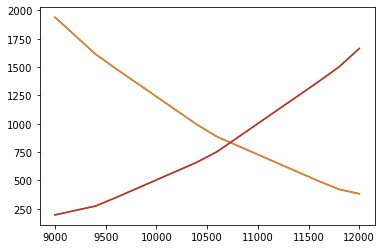

In [2]:
"""Run callibration file and return the interest rate, div yield, u and d"""
r, y, u, d = calibration()

## Question 1

In [16]:
T = 12
dt = 1/T
i0 = 11118
c = 0.1
alpha = 1
beta = 0.8

In [17]:

tree = Binomial(r, T, dt, i0, u, d, y)

print('{:10} : {:.4f}'.format(' rcn', tree.price_RCN(alpha, c)))
print('{:10} : {:.4f}'.format('brcn', tree.price_RCN(alpha, c, beta)))
print('{:10} : {:.4f}'.format('bond', tree.price_bond(c*dt)))


 rcn       : 0.8114
brcn       : 0.8454
bond       : 1.1083


## Question 2

In [11]:
par_price = 1

def f(c, *args):
    alpha, beta, type = args
    if type == 'RCN': p = tree.price_RCN(alpha, c)
    if type == 'BRCN': p = tree.price_RCN(alpha, c, beta)
    return (par_price - p) ** 2

res_RCN = minimize(f, 0, args=(alpha, beta, 'RCN'))
res_BRCN = minimize(f, 0, args=(alpha, beta, 'BRCN'))
print('alpha = {}, beta = {}'.format(alpha, beta))
if res_RCN.success: print('Par coupon for RCN:  c = {:.2%}'.format(res_RCN.x[0]))
if res_BRCN.success: print('Par coupon for BRCN: c = {:.2%}'.format(res_BRCN.x[0]))

alpha = 1, beta = 0.8
Par coupon for RCN:  c = 28.78%
Par coupon for BRCN: c = 25.40%


In [12]:
res_RCN = minimize(f, 0, args=(alpha, beta, 'RCN'))
rates = [0.4,0.6,0.8,1]
alphas = np.linspace(0.6, 1, 10)
betas = np.outer(alphas, rates)

rcn_c = []
brcn_c = np.zeros_like(betas)

for i, b in enumerate(betas):
    alpha = alphas[i]
    res_RCN = minimize(f, 0, args=(alpha, beta, 'RCN'))
    rcn_c.append(res_RCN.x[0]*100)
    for j, beta in enumerate(b):
        res_BRCN = minimize(f, 0, args=(alpha, beta, 'BRCN'))
        brcn_c[i,j] = res_BRCN.x[0]*100

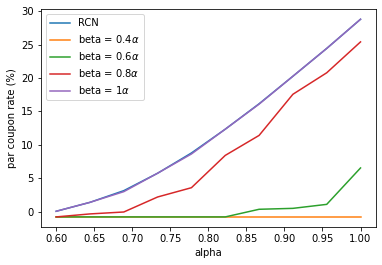

In [13]:
plt.plot(alphas, rcn_c)
for c in brcn_c.T:
    plt.plot(alphas, c)
plt.xlabel('alpha')
plt.ylabel('par coupon rate (%)')
plt.legend(['RCN'] + [r'beta = {}$\alpha$'.format(r) for r in rates])
plt.show()

## Question 3

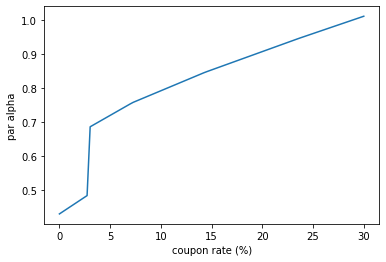

In [14]:
coupons = np.linspace(0, 0.30, 100)
par_price = 1

def g(alpha, *args):
    c, = args
    return (par_price - tree.price_RCN(alpha, c)) ** 2

alphas = []
for c in coupons:
    res = minimize(g, 1, args=(c))
    alphas.append(res.x[0])

plt.plot(coupons*100, alphas)
plt.xlabel('coupon rate (%)')
plt.ylabel('par alpha')
plt.show()

## Question 4